In [1]:
import pandas as pd
import numpy as np
from sklearn. impute import KNNImputer
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('data/Nuorten_arviointikysely_kannabishanke.xls', sheet_name=1, usecols='H:R', skiprows=2)
df.head()

,Minkä ikäinen olet?,Mitä sukupuolta edustat?,Mikä on koulutustaustasi?,Unnamed: 10,Minkä kokoisella paikkakunnalla asut?,Missä maakunnassa asut?,Mikä seuraavista vastaa eniten musiikkimakuasi?,Minkä ikäisenä käytit ensimmäistä kertaa kannabista?,Kuinka monena päivänä viimeisen kuukauden aikana olet käyttänyt kannabista?,"Päivinä, jolloin käytät kannabista, kuinka paljon tyypillisesti käytät ?(grammoissa, 0,1g-5g)",Mikä seuraavista kuvaa parhaiten syitäsi käyttää kannabista?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27 - 29,Nainen,Ylioppilastutkinto,NaN,"Pääkaupunkiseutu (Helsinki, Espoo, Vantaa, Kau...",Uusimaa,Drum and Bass / Jungle,28.0,1 - 5,0.2,Käytän kannabista useimmiten itse-lääkinnällis...
2,27 - 29,Mies,Ammatillinen tutkinto,NaN,50 000 - 100 000 asukkaan kaupunki,Satakunta,Metalli / Thrash-metalli / Doom-metalli jne.,16.0,20 - 30,2,Käytän kannabista useimmiten itse-lääkinnällis...
3,30 +,Nainen,Ylioppilastutkinto,NaN,Muu yli 100 000 asukkaan kaupunki,NaN,NaN,17.0,1 - 5,0.1,Käytän kannabista useimmiten itse-lääkinnällis...
4,21 - 23,Nainen,Peruskoulu tai vähemmän,NaN,50 000 - 100 000 asukkaan kaupunki,Satakunta,Metalli / Thrash-metalli / Doom-metalli jne.,16.0,20 - 30,2,Käytän kannabista toisinaan itse-lääkinnällisi...


In [3]:
# delete the first row by index value 0
df = df.drop(labels=0, axis=0)
# delete education comment column
df= df.drop(columns=df.columns[3])

df.tail()

,Minkä ikäinen olet?,Mitä sukupuolta edustat?,Mikä on koulutustaustasi?,Minkä kokoisella paikkakunnalla asut?,Missä maakunnassa asut?,Mikä seuraavista vastaa eniten musiikkimakuasi?,Minkä ikäisenä käytit ensimmäistä kertaa kannabista?,Kuinka monena päivänä viimeisen kuukauden aikana olet käyttänyt kannabista?,"Päivinä, jolloin käytät kannabista, kuinka paljon tyypillisesti käytät ?(grammoissa, 0,1g-5g)",Mikä seuraavista kuvaa parhaiten syitäsi käyttää kannabista?
243,24 - 26,Mies,Ammatillinen tutkinto,Muu yli 100 000 asukkaan kaupunki,Keski-Suomi,Punk / Post punk / Ska punk jne.,NaN,NaN,NaN,NaN
244,18 - 20,Nainen,Peruskoulu tai vähemmän,Muu maaseutu,Pirkanmaa,Reggae / Dub / Ska / Two Tone,15.0,1 - 5,0.2,Käytän kannabista useimmiten itse-lääkinnällis...
245,18 - 20,Nainen,"Jokin muu, mikä",Muu yli 100 000 asukkaan kaupunki,Varsinais-Suomi,Elektro,7.0,5 - 10,0.5,Käytän kannabista toisinaan itse-lääkinnällisi...
246,24 - 26,Nainen,Ammatillinen tutkinto,Muu yli 100 000 asukkaan kaupunki,Pohjois-Savo,Hip Hop / R 'n' b / Rap / Drill jne.,15.0,20 - 30,0.3,Käytän kannabista useimmiten itse-lääkinnällis...
247,18 - 20,Nainen,"Jokin muu, mikä",50 000 - 100 000 asukkaan kaupunki,Satakunta,Metalli / Thrash-metalli / Doom-metalli jne.,11.0,5 - 10,0.7,Käytän kannabista toisinaan itse-lääkinnällisi...


In [4]:
# dimensio of the data
df.shape

(247, 10)

#### How many missing values?

In [5]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [6]:
missing_values_table(df)

Your selected dataframe has 10 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
Kuinka monena päivänä viimeisen kuukauden aikana olet käyttänyt kannabista?,16,6.5
Mikä seuraavista vastaa eniten musiikkimakuasi?,10,4.0
"Päivinä, jolloin käytät kannabista, kuinka paljon tyypillisesti käytät ?(grammoissa, 0,1g-5g)",9,3.6
Minkä ikäisenä käytit ensimmäistä kertaa kannabista?,8,3.2
Mikä seuraavista kuvaa parhaiten syitäsi käyttää kannabista?,8,3.2
Missä maakunnassa asut?,7,2.8
Minkä ikäinen olet?,5,2.0
Mitä sukupuolta edustat?,4,1.6
Mikä on koulutustaustasi?,4,1.6
Minkä kokoisella paikkakunnalla asut?,4,1.6


In [7]:
# helper function for replacing missing values
# it is for mean and mode replacement but we will use KNN imputation

import numpy
import pandas 

from sklearn.base import TransformerMixin

class SeriesImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        If the Series is of dtype Object, then impute with the most frequent object.
        If the Series is not of dtype Object, then impute with the mean.  

        """
    def fit(self, X, y=None):
        if   X.dtype == numpy.dtype('O'): self.fill = X.value_counts().index[0]
        else                            : self.fill = X.mean()
        return self

    def transform(self, X, y=None):
       return X.fillna(self.fill)

## Gender

<AxesSubplot: >

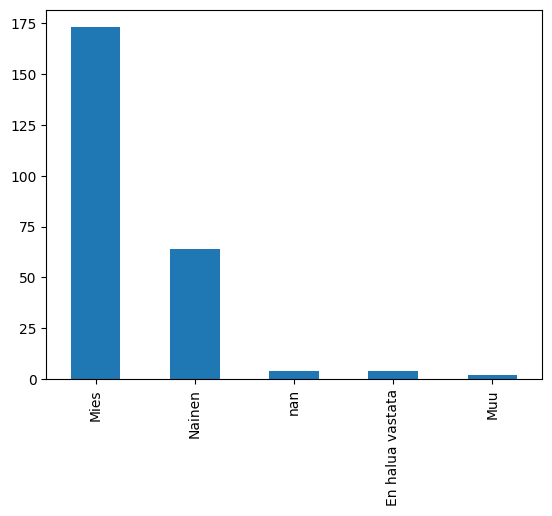

In [8]:
#df['gender'] = np.where(df['Mitä sukupuolta edustat?']=='Nainen', 0, 1)
df['gender']= df['Mitä sukupuolta edustat?']

df.gender.value_counts(dropna=False).plot(kind='bar')

In [9]:
# Since it is gender, I prefer to remove the empty ones - only 4 cases
df.dropna(subset=['gender'], how='all', inplace=True) # remove empty genders 
print('New Dimension:', df.shape)
print(df.gender.value_counts(dropna=False))

New Dimension: (243, 11)
Mies                173
Nainen               64
En halua vastata      4
Muu                   2
Name: gender, dtype: int64


In [10]:
# delete other and not want to declare since 6 cases consitute a small group
indexgender = df[ (df.gender == 'En halua vastata') | (df.gender== 'Muu') ].index
df.drop(indexgender , inplace=True)
#df.head()

In [11]:
print('final shape of the data:', df.shape)
df.gender.value_counts(dropna=False)

final shape of the data: (237, 11)


Mies      173
Nainen     64
Name: gender, dtype: int64

<AxesSubplot: >

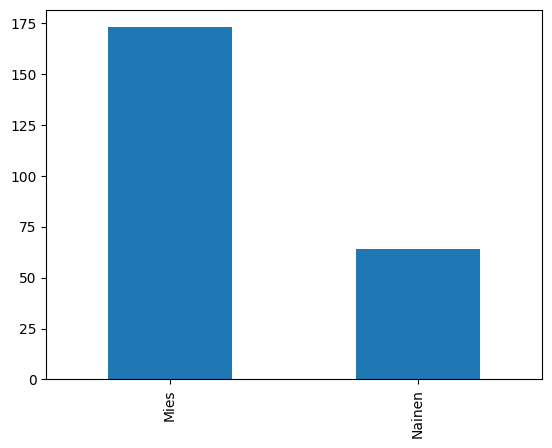

In [12]:
a  = SeriesImputer()             # Initialize the imputer
a.fit(df['gender'])              # Fit the imputer
df['gender'] = a.transform(df['gender'])   # Get a new series
df.gender.value_counts(dropna=False).plot(kind='bar')

In [13]:
#https://stackoverflow.com/questions/39109045/numpy-where-with-multiple-conditions

def conditions(x):
    if   x == 'Mies':   return "Male"
    else:           return "Female"

func = np.vectorize(conditions)
gender_class = func(df["gender"])

df["gender"] = gender_class
#df.gendermap.value_counts(dropna=False).plot(kind='bar')

In [14]:
df.gender.value_counts(dropna=False)

Male      173
Female     64
Name: gender, dtype: int64

In [15]:
# here convert them in binary format, female is 1
df['gender_binary'] = np.where(df.gender=='Female', 1, 0)
df.gender_binary.value_counts()

0    173
1     64
Name: gender_binary, dtype: int64

## Age

18 - 20    73
21 - 23    50
30 +       37
24 - 26    31
27 - 29    29
15 - 17    16
NaN         1
Name: age, dtype: int64


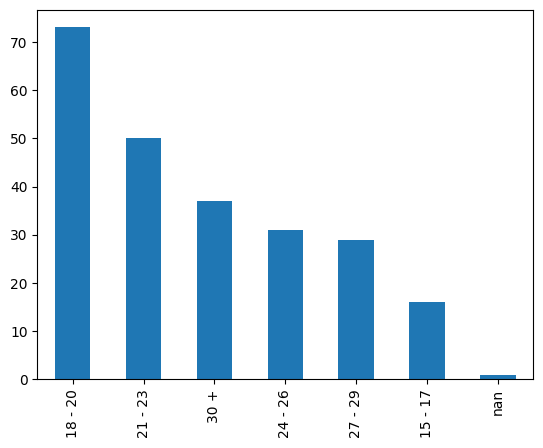

In [16]:
df['age']= df['Minkä ikäinen olet?']
df.age.value_counts(dropna=False).plot(kind='bar')
print(df.age.value_counts(dropna=False))

### Ordinal

In [17]:
# map the age values to 0 and 1
df['age_ordinal' ] = df.age.map ({'15 - 17':'1','18 - 20' :'2', '21 - 23' :'3', '24 - 26':'4', '27 - 29':'5', '30 +':'6'})
#df['age_ordinal' ] = df['age_ordinal' ].astype(int)
df['age_ordinal' ] = pd.to_numeric(df['age_ordinal' ])
df.age_ordinal.value_counts(dropna=False)

2.0    73
3.0    50
6.0    37
4.0    31
5.0    29
1.0    16
NaN     1
Name: age_ordinal, dtype: int64

<AxesSubplot: >

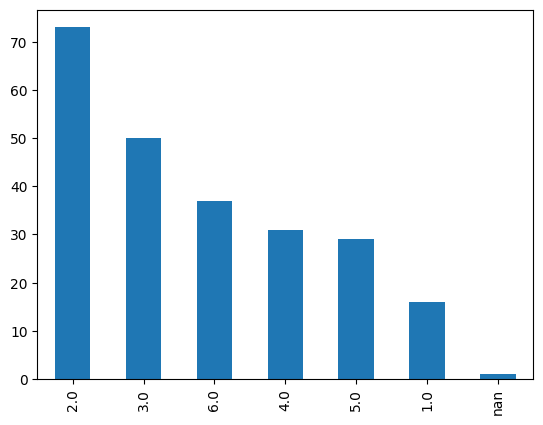

In [18]:
#a  = SeriesImputer()             # Initialize the imputer
#a.fit(df['age_ordinal'])              # Fit the imputer
#df['age_ordinal'] = a.transform(df['age_ordinal'])   # Get a new series
df.age_ordinal.value_counts(dropna=False).plot(kind='bar')

## Education

<AxesSubplot: >

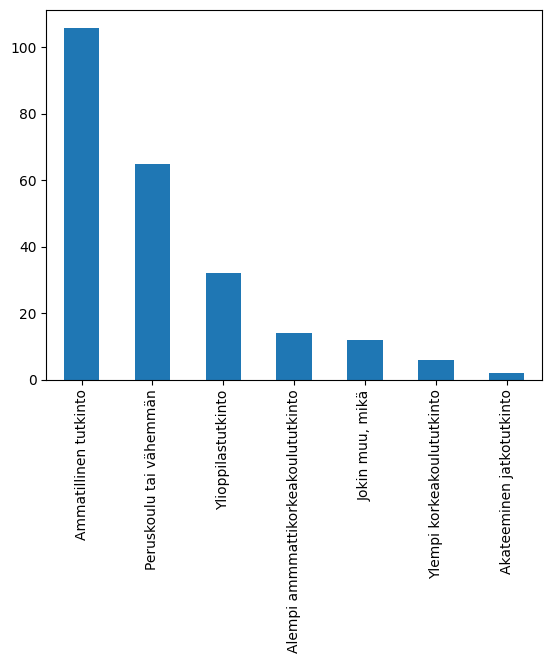

In [19]:
df['education'] = df['Mikä on koulutustaustasi?']
df.education.value_counts(dropna=False).plot(kind='bar')

<AxesSubplot: >

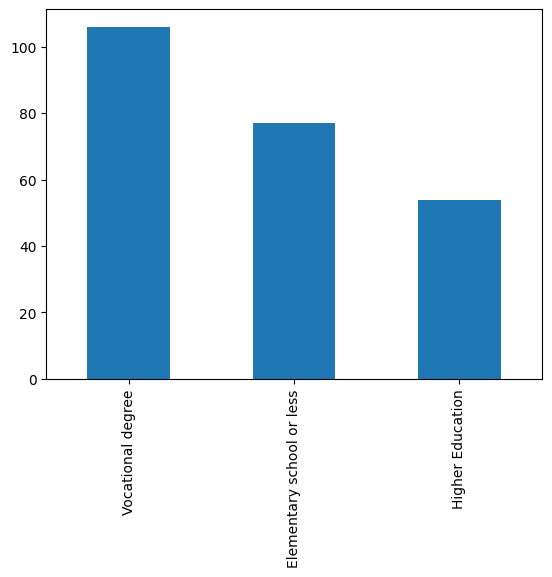

In [20]:
df['educationmap'] = df.education.map({
    'Ammatillinen tutkinto': 'Vocational degree',
    'Peruskoulu tai vähemmän':'Elementary school or less',
    'Ylioppilastutkinto': 'Higher Education',
    'Alempi ammmattikorkeakoulututkinto': 'Higher Education',
    'Jokin muu, mikä': 'Elementary school or less', # other means nothing
    'Ylempi korkeakoulututkinto': 'Higher Education',
    'Akateeminen jatkotutkinto': 'Higher Education'
})
df.educationmap.value_counts(dropna=False).plot(kind='bar')

<AxesSubplot: >

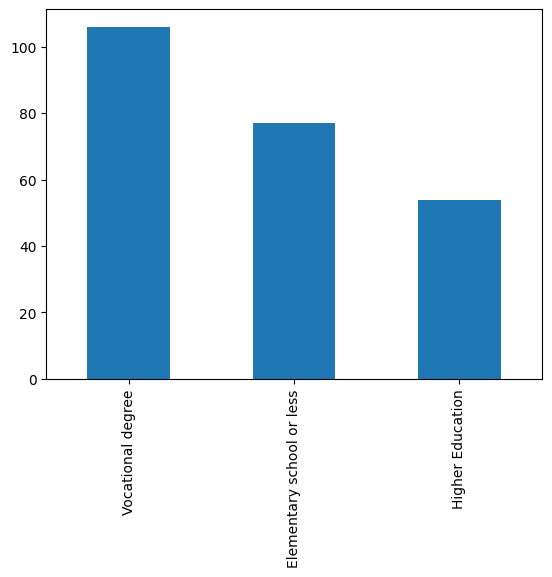

In [21]:
#a  = SeriesImputer()             # Initialize the imputer
#a.fit(df['educationmap'])              # Fit the imputer
#df['educationmap'] = a.transform(df['educationmap'])   # Get a new series
df.educationmap.value_counts(dropna=False).plot(kind='bar')

<AxesSubplot: >

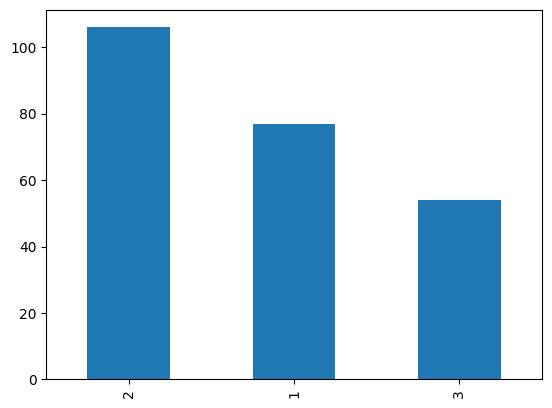

In [22]:
df['education_ordinal'] = df.educationmap.map({
    'Vocational degree': '2',
    'Elementary school or less':'1',
    'Higher Education': '3',
    
})

df['education_ordinal'] = pd.to_numeric(df['education_ordinal'])


df.education_ordinal.value_counts(dropna=False).plot(kind='bar')

## city

<AxesSubplot: >

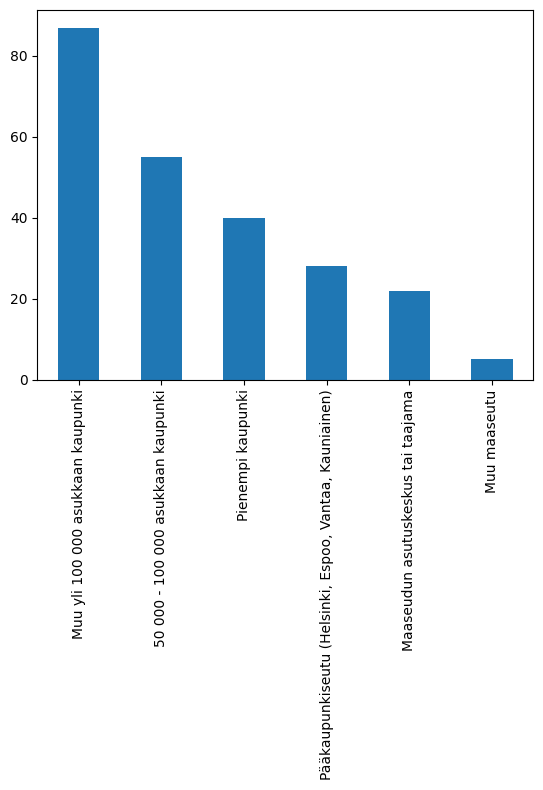

In [23]:
df['city'] = df['Minkä kokoisella paikkakunnalla asut?']

df.city.value_counts(dropna= False).plot(kind='bar')

<AxesSubplot: >

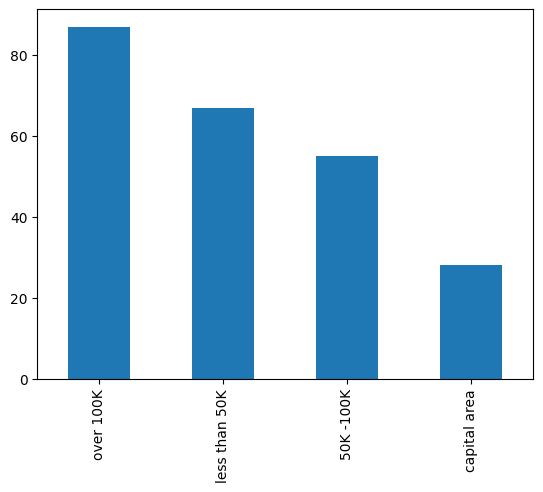

In [24]:
df['citymap'] = df.city.map({
    'Muu yli 100 000 asukkaan kaupunki': 'over 100K',
    '50 000 - 100 000 asukkaan kaupunki':'50K -100K',
    'Pienempi kaupunki': 'less than 50K',
    'Pääkaupunkiseutu (Helsinki, Espoo, Vantaa, Kauniainen)': 'capital area',
    'Maaseudun asutuskeskus tai taajama':'less than 50K',
    'Muu maaseutu':'less than 50K'
})

df.citymap.value_counts(dropna= False).plot(kind='bar')

<AxesSubplot: >

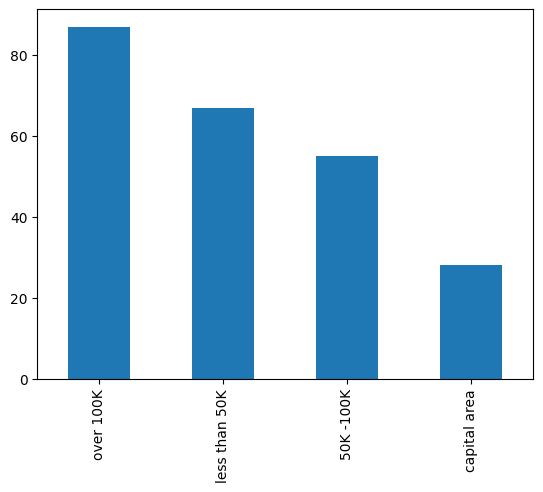

In [25]:
#a  = SeriesImputer()             # Initialize the imputer
#a.fit(df['citymap'])              # Fit the imputer
#df['citymap'] = a.transform(df['citymap'])   # Get a new series
df.citymap.value_counts(dropna=False).plot(kind='bar')

<AxesSubplot: >

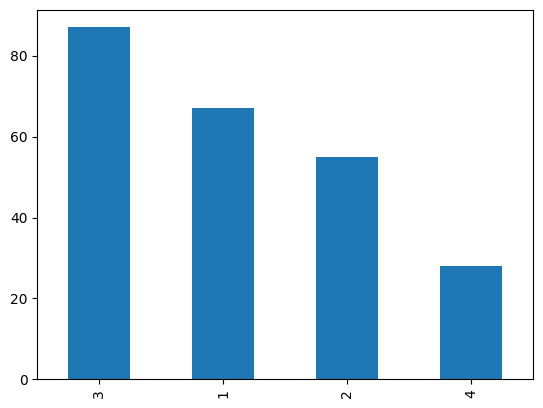

In [26]:
df['city_ordinal'] = df.citymap.map({
    'capital area': '4',
    'over 100K':'3',
    '50K -100K': '2',
    'less than 50K': '1',
})

df['city_ordinal'] = pd.to_numeric(df['city_ordinal'])


df.city_ordinal.value_counts(dropna= False).plot(kind='bar')

## Onset age

<AxesSubplot: >

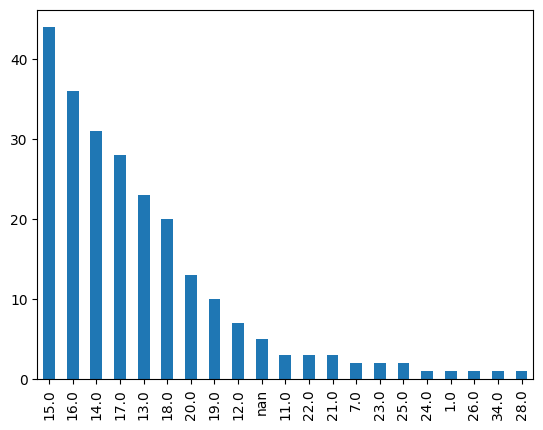

In [27]:
df['onset'] = df['Minkä ikäisenä käytit ensimmäistä kertaa kannabista?']
df.onset.value_counts(dropna=False).plot(kind='bar')

<AxesSubplot: >

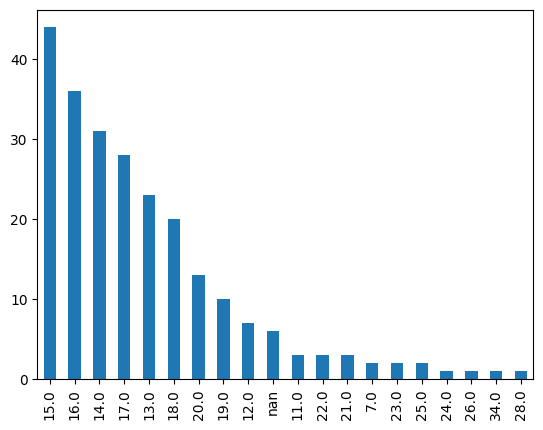

In [28]:
# there is a 1 onset age, I make it nan

df['onset']= df['onset'].replace(1, np.nan)
df.onset.value_counts(dropna=False).plot(kind='bar')

In [29]:
df['onset'].describe()

count    231.000000
mean      16.116883
std        3.094065
min        7.000000
25%       14.000000
50%       16.000000
75%       17.000000
max       34.000000
Name: onset, dtype: float64

In [30]:
df[df['onset']==7]

,Minkä ikäinen olet?,Mitä sukupuolta edustat?,Mikä on koulutustaustasi?,Minkä kokoisella paikkakunnalla asut?,Missä maakunnassa asut?,Mikä seuraavista vastaa eniten musiikkimakuasi?,Minkä ikäisenä käytit ensimmäistä kertaa kannabista?,Kuinka monena päivänä viimeisen kuukauden aikana olet käyttänyt kannabista?,"Päivinä, jolloin käytät kannabista, kuinka paljon tyypillisesti käytät ?(grammoissa, 0,1g-5g)",Mikä seuraavista kuvaa parhaiten syitäsi käyttää kannabista?,...,gender_binary,age,age_ordinal,education,educationmap,education_ordinal,city,citymap,city_ordinal,onset
68,21 - 23,Mies,Peruskoulu tai vähemmän,"Pääkaupunkiseutu (Helsinki, Espoo, Vantaa, Kau...",Uusimaa,Hip Hop / R 'n' b / Rap / Drill jne.,7.0,1 - 5,0.1,Käytän kannabista useimmiten itse-lääkinnällis...,...,0,21 - 23,3.0,Peruskoulu tai vähemmän,Elementary school or less,1,"Pääkaupunkiseutu (Helsinki, Espoo, Vantaa, Kau...",capital area,4,7.0
245,18 - 20,Nainen,"Jokin muu, mikä",Muu yli 100 000 asukkaan kaupunki,Varsinais-Suomi,Elektro,7.0,5 - 10,0.5,Käytän kannabista toisinaan itse-lääkinnällisi...,...,1,18 - 20,2.0,"Jokin muu, mikä",Elementary school or less,1,Muu yli 100 000 asukkaan kaupunki,over 100K,3,7.0


## Montly use

<AxesSubplot: >

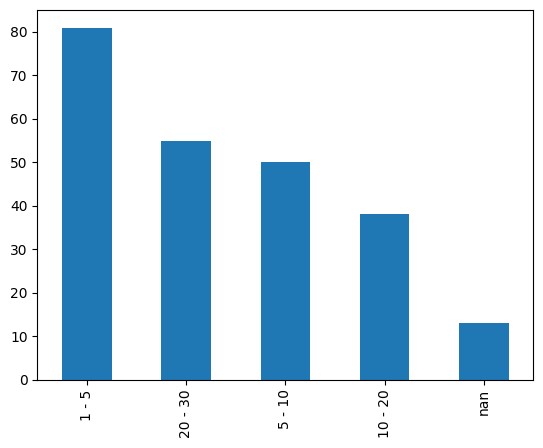

In [31]:
df['monthlymap'] = df['Kuinka monena päivänä viimeisen kuukauden aikana olet käyttänyt kannabista?']
df.monthlymap.value_counts(dropna=False).plot(kind='bar')

<AxesSubplot: >

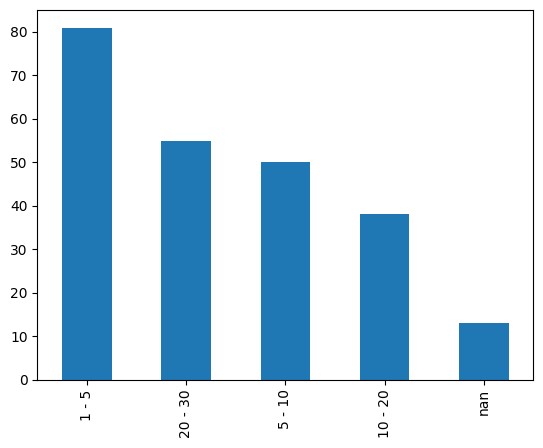

In [32]:
#a  = SeriesImputer()             # Initialize the imputer
#a.fit(df['monthlymap'])              # Fit the imputer
#df['monthlymap'] = a.transform(df['monthlymap'])   # Get a new series
df.monthlymap.value_counts(dropna=False).plot(kind='bar')

In [33]:
df.monthlymap.value_counts()

1 - 5      81
20 - 30    55
5 - 10     50
10 - 20    38
Name: monthlymap, dtype: int64

<AxesSubplot: >

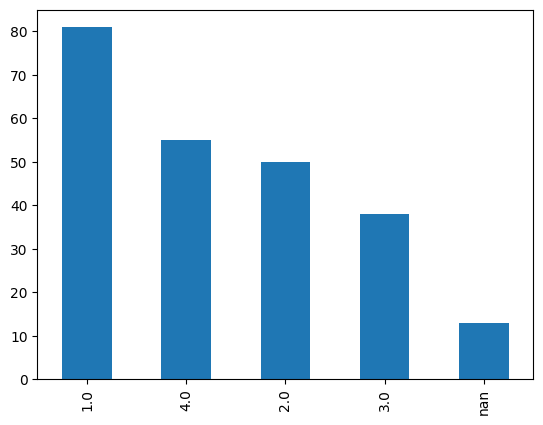

In [34]:
df['monthly_ordinal'] = df.monthlymap.map({
    '1 - 5': '1',
    '5 - 10':'2',
    '10 - 20': '3',
    '20 - 30': '4',
})

df['monthly_ordinal'] = pd.to_numeric(df['monthly_ordinal'])


df.monthly_ordinal.value_counts(dropna= False).plot(kind='bar')

## Amount

<AxesSubplot: >

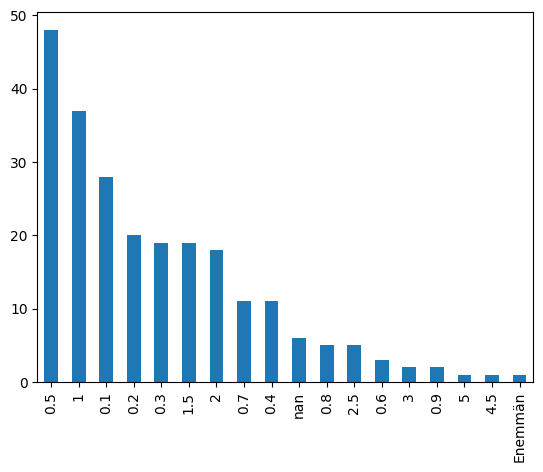

In [35]:
df['amount'] = df['Päivinä, jolloin käytät kannabista, kuinka paljon tyypillisesti käytät ?(grammoissa, 0,1g-5g)'].astype('str')
df.amount.value_counts(dropna=False).plot(kind='bar')

<AxesSubplot: >

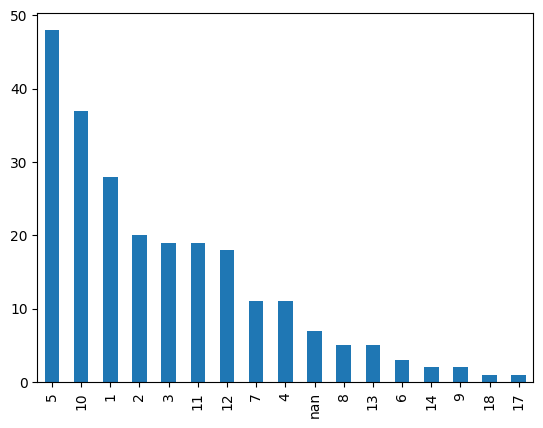

In [36]:
df['amount_ordinal'] = df.amount.map({'0.1': '1',
                                '0.2': '2',
                                '0.3': '3',
                                '0.4': '4',
                                '0.5': '5',
                                '0.6': '6',
                                '0.7': '7',
                                '0.8': '8',
                                '0.9': '9',
                                '1': '10',
                                '1.5': '11',
                                '2': '12',
                                '2.5': '13',
                                '3': '14',
                                '3.5': '15',
                                '4': '16',
                                '4.5': '17',
                                '5': '18',
                                'Enammän': '19'
                              
                               })
df.amount_ordinal.value_counts(dropna=False).plot(kind='bar')

<AxesSubplot: >

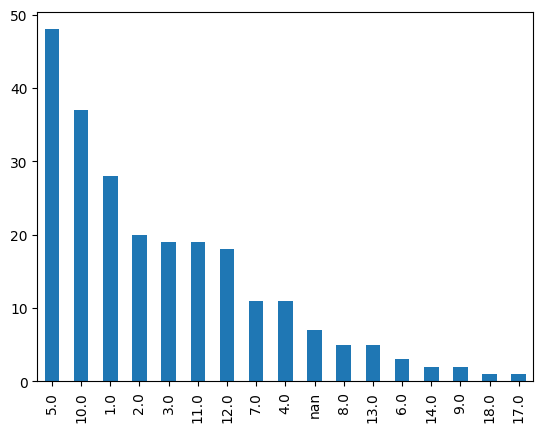

In [37]:
#a  = SeriesImputer()             # Initialize the imputer
#a.fit(df['amount_ordinal'])              # Fit the imputer
#df['amount_ordinal'] = a.transform(df['amount_ordinal'])   # Get a new series

df['amount_ordinal'] = pd.to_numeric(df['amount_ordinal'])

df.amount_ordinal.value_counts(dropna=False).plot(kind='bar')

## Dependent variable

<AxesSubplot: >

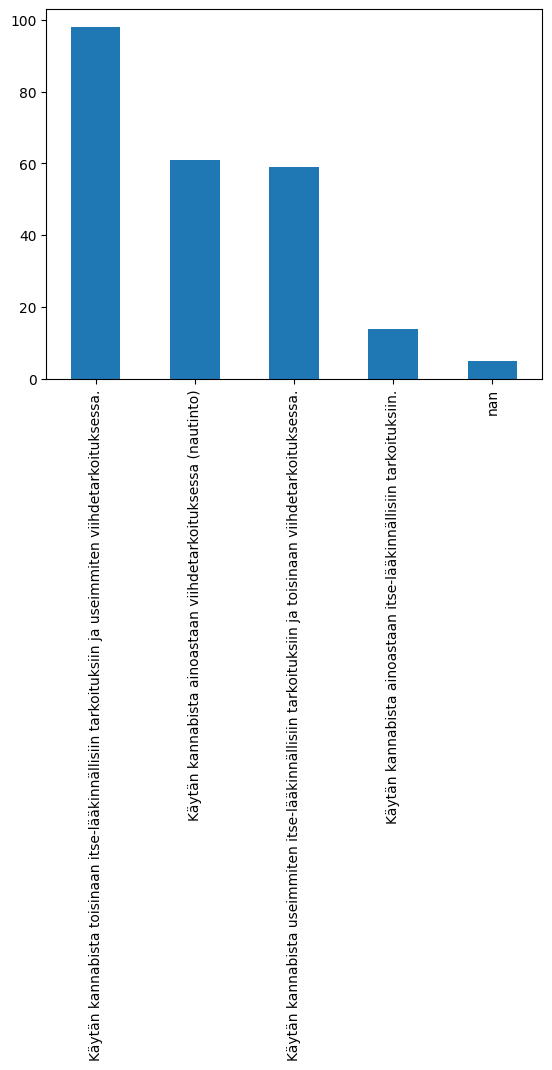

In [38]:
df['reason']=df['Mikä seuraavista kuvaa parhaiten syitäsi käyttää kannabista?']
df.reason.value_counts(dropna=False).plot(kind='bar')

In [39]:
df['cannabis'] = df.reason.map({
     'Käytän kannabista ainoastaan viihdetarkoituksessa (nautinto)' : '0',
    'Käytän kannabista toisinaan itse-lääkinnällisiin tarkoituksiin ja useimmiten viihdetarkoituksessa.': '0',
    'Käytän kannabista useimmiten itse-lääkinnällisiin tarkoituksiin ja toisinaan viihdetarkoituksessa.' : '1',
    'Käytän kannabista ainoastaan itse-lääkinnällisiin tarkoituksiin.': '1',
                              
                               })

<AxesSubplot: >

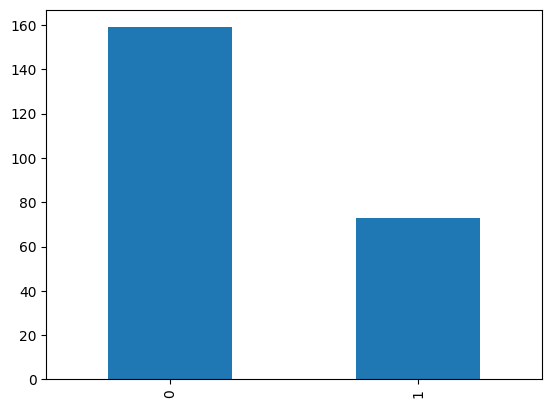

In [40]:
df.cannabis.value_counts().plot(kind='bar')

In [41]:
df['cannabis'] = pd.to_numeric(df['cannabis'])

df.cannabis.value_counts()

0.0    159
1.0     73
Name: cannabis, dtype: int64

# Final process

In [42]:
data = df[['cannabis','age_ordinal','gender_binary','education_ordinal','city_ordinal', 'onset', 'monthly_ordinal','amount_ordinal']]
missing_values_table(data)

Your selected dataframe has 8 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
monthly_ordinal,13,5.5
amount_ordinal,7,3.0
onset,6,2.5
cannabis,5,2.1
age_ordinal,1,0.4


In [43]:
data.dtypes

cannabis             float64
age_ordinal          float64
gender_binary          int64
education_ordinal      int64
city_ordinal           int64
onset                float64
monthly_ordinal      float64
amount_ordinal       float64
dtype: object

## Missing data imputation

Missing value imputation isn’t that difficult of a task to do. Methods range from simple mean imputation and complete removing of the observation to more advanced techniques like MICE. The kNN algorithm is a nonparametric method used for classification and regression. In both cases, the input consists of the k-closest training examples in the feature space. The output depends on whether kNN is used for classification or regression. In kNN classification, an object is classified by a plurality vote of its neighbors, and the object is assigned to the class most common among its k-nearest neighbors. In kNN regression, the output is the average of the values of k-nearest neighbors. 

In [44]:
# https://www.kaggle.com/code/mitramir5/missing-values-ordinal-data-and-stories
from sklearn.experimental import enable_iterative_imputer  

from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=15)
]

imputer = IterativeImputer(random_state=0, estimator=estimators[1])
imputer.fit(data)
imputed_df = pd.DataFrame(imputer.transform(data))
imputed_df.columns = data.columns
imputed_df.name = 'imputed'
missing_values_table(imputed_df)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [45]:
# convert column "a" to int64 dtype and "b" to complex type
#data = data.astype({"age_ordinal": int, "education_ordinal": int, "monthly_ordinal": int,"amount_ordinal": int,"city_ordinal": int, })

In [46]:
imputed_df.isnull().sum()

cannabis             0
age_ordinal          0
gender_binary        0
education_ordinal    0
city_ordinal         0
onset                0
monthly_ordinal      0
amount_ordinal       0
dtype: int64

In [47]:
imputed_df.dtypes

cannabis             float64
age_ordinal          float64
gender_binary        float64
education_ordinal    float64
city_ordinal         float64
onset                float64
monthly_ordinal      float64
amount_ordinal       float64
dtype: object

In [48]:
# re-check the final outcomes of dependent variable
print(data.cannabis.value_counts(dropna=False))
print(imputed_df.cannabis.value_counts())

0.0    159
1.0     73
NaN      5
Name: cannabis, dtype: int64
0.0    161
1.0     76
Name: cannabis, dtype: int64


In [49]:
# another independent variable check
print(data.monthly_ordinal.value_counts(dropna=False))
print(imputed_df.monthly_ordinal.value_counts())

1.0    81
4.0    55
2.0    50
3.0    38
NaN    13
Name: monthly_ordinal, dtype: int64
1.0    87
4.0    57
2.0    51
3.0    42
Name: monthly_ordinal, dtype: int64


In [50]:
imputed_df.to_csv('data/processed.csv')

# Chi-Square test

Normally we are planning to use independent variables as continous variable except gender, I also check their distribution in chi-square since they are categorical/ordinal at origins. 

In [51]:
# https://pythonfordatascienceorg.wordpress.com/chi-square-python/
from scipy import stats

# To get row proportions, pass ‘Row’ into the “prop= ” argument for the function
# To get col proportions, pass ‘Col’ into the “prop= ”
# like, prop= 'Row'
# else it is False.


def chi2_table(series1, series2, to_csv = False, csv_name = None, prop= 'Row'):
    
    if type(series1) != list:
        crosstab = pd.crosstab(series1, series2)
        crosstab2 = pd.crosstab(series1, series2, margins= True)
        crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
        crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
        chi2, p, dof, expected = stats.chi2_contingency(crosstab)
        
        if prop == False:
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                                             
                file = open(csv_name, 'a')
                file.write(f"{crosstab2.columns.name}\n")
                file.close()
                crosstab2.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()              
                
        if prop == 'Row':
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                
                file = open(csv_name, 'a')
                file.write(f"{crosstab_proprow.columns.name}\n")
                file.close()
                crosstab_proprow.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()

        if prop == 'Col':
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")

            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                    
                file = open(csv_name, 'a')
                file.write(f"{crosstab_propcol.columns.name}\n")
                file.close()
                crosstab_propcol.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()

    elif type(series1) == list and type(series2) == list:
        for entry2 in series2:
            for entry1 in series1:
                crosstab = pd.crosstab(entry1, entry2)
                crosstab2 = pd.crosstab(entry1, entry2, margins= True)
                crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
                crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
                chi2, p, dof, expected = stats.chi2_contingency(crosstab)
                
                if prop == False:
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab2.columns.name}\n")
                        file.close()
                        crosstab2.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()                        

                if prop == 'Row':
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab_proprow.columns.name}\n")
                        file.close()
                        crosstab_proprow.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()
                    
                if prop == 'Col':
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab_propcol.columns.name}\n")
                        file.close()
                        crosstab_propcol.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()


    elif type(series1) == list:
        for entry in series1:
            crosstab = pd.crosstab(entry, series2)
            crosstab2 = pd.crosstab(entry, series2, margins= True)
            crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
            crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
            chi2, p, dof, expected = stats.chi2_contingency(crosstab)
            
            if prop == False:
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab2.columns.name}\n")
                    file.close()
                    crosstab2.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

            if prop == 'Row':
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab_proprow.columns.name}\n")
                    file.close()
                    crosstab_proprow.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

            if prop == 'Col':
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab_propcol.columns.name}\n")
                    file.close()
                    crosstab_propcol.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

In [52]:
imputed_df['cannabis'].value_counts(normalize=True)

0.0    0.679325
1.0    0.320675
Name: cannabis, dtype: float64

In [53]:
chi2_table(imputed_df['gender_binary'], imputed_df['cannabis'])


 Chi-Square test between gender_binary and cannabis 
 
 cannabis         0.0    1.0    All
gender_binary                     
0.0            71.68  28.32  100.0
1.0            57.81  42.19  100.0
All            67.93  32.07  100.0 
 
 Pearson Chi2(1)= 3.5101 p-value= 0.0610


In [54]:
# only significant result
chi2_table(imputed_df['age_ordinal'], imputed_df['cannabis'])


 Chi-Square test between age_ordinal and cannabis 
 
 cannabis       0.0    1.0    All
age_ordinal                     
1.0          87.50  12.50  100.0
2.0          79.45  20.55  100.0
3.0          74.00  26.00  100.0
4.0          54.84  45.16  100.0
5.0          58.62  41.38  100.0
6.0          47.37  52.63  100.0
All          67.93  32.07  100.0 
 
 Pearson Chi2(5)= 19.0748 p-value= 0.0019


In [55]:
chi2_table(imputed_df['education_ordinal'], imputed_df['cannabis'])


 Chi-Square test between education_ordinal and cannabis 
 
 cannabis             0.0    1.0    All
education_ordinal                     
1.0                67.53  32.47  100.0
2.0                65.09  34.91  100.0
3.0                74.07  25.93  100.0
All                67.93  32.07  100.0 
 
 Pearson Chi2(2)= 1.3326 p-value= 0.5136


In [56]:
chi2_table(imputed_df['monthly_ordinal'], imputed_df['cannabis'])


 Chi-Square test between monthly_ordinal and cannabis 
 
 cannabis           0.0    1.0    All
monthly_ordinal                     
1.0              63.22  36.78  100.0
2.0              86.27  13.73  100.0
3.0              66.67  33.33  100.0
4.0              59.65  40.35  100.0
All              67.93  32.07  100.0 
 
 Pearson Chi2(3)= 10.5900 p-value= 0.0142


In [57]:
chi2_table(imputed_df['amount_ordinal'], imputed_df['cannabis'])


 Chi-Square test between amount_ordinal and cannabis 
 
 cannabis           0.0     1.0    All
amount_ordinal                       
1.0              53.33   46.67  100.0
2.0              76.19   23.81  100.0
3.0              63.16   36.84  100.0
4.0              72.73   27.27  100.0
5.0              81.25   18.75  100.0
6.0              66.67   33.33  100.0
7.0              72.73   27.27  100.0
8.0             100.00    0.00  100.0
9.0              50.00   50.00  100.0
10.0             68.29   31.71  100.0
11.0             57.89   42.11  100.0
12.0             66.67   33.33  100.0
13.0             40.00   60.00  100.0
14.0              0.00  100.00  100.0
17.0            100.00    0.00  100.0
18.0              0.00  100.00  100.0
All              67.93   32.07  100.0 
 
 Pearson Chi2(15)= 20.1018 p-value= 0.1681


In [58]:
chi2_table(imputed_df['city_ordinal'], imputed_df['cannabis'])


 Chi-Square test between city_ordinal and cannabis 
 
 cannabis        0.0    1.0    All
city_ordinal                     
1.0           56.72  43.28  100.0
2.0           72.73  27.27  100.0
3.0           72.41  27.59  100.0
4.0           71.43  28.57  100.0
All           67.93  32.07  100.0 
 
 Pearson Chi2(3)= 5.4087 p-value= 0.1442


In [59]:
chi2_table(imputed_df['onset'], imputed_df['cannabis'])


 Chi-Square test between onset and cannabis 
 
 cannabis     0.0     1.0    All
onset                          
7.0        50.00   50.00  100.0
11.0      100.00    0.00  100.0
12.0       71.43   28.57  100.0
13.0       39.13   60.87  100.0
14.0       81.25   18.75  100.0
15.0       63.64   36.36  100.0
16.0       72.97   27.03  100.0
17.0       66.67   33.33  100.0
18.0       57.14   42.86  100.0
19.0       90.00   10.00  100.0
20.0       71.43   28.57  100.0
21.0      100.00    0.00  100.0
22.0       66.67   33.33  100.0
23.0      100.00    0.00  100.0
24.0      100.00    0.00  100.0
25.0       50.00   50.00  100.0
26.0      100.00    0.00  100.0
28.0        0.00  100.00  100.0
34.0      100.00    0.00  100.0
All        67.93   32.07  100.0 
 
 Pearson Chi2(18)= 23.5694 p-value= 0.1696


### scipy library

In [60]:
# https://rowannicholls.github.io/python/statistics/hypothesis_testing/unpaired_two_sample_t_test.html
def get_significance(p):
    """Returns the significance of a p-values as a string of stars."""
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''


def round_p_value(p):
    """Round a small p-value so that it is human-readable."""
    if p < 0.001:
        return '<0.001'
    else:
        return f'{p:5.3}'


In [61]:
# similar to R programming F statistics results

# Import the library
import scipy.stats as stats

# https://stackoverflow.com/questions/21494141/how-do-i-do-a-f-test-in-python
def f_test(x, y, alt="two_sided"):
    """
    Calculates the F-test.
    :param x: The first group of data
    :param y: The second group of data
    :param alt: The alternative hypothesis, one of "two_sided" (default), "greater" or "less"
    :return: a tuple with the F statistic value and the p-value.
    """
    df1 = len(x) - 1
    df2 = len(y) - 1
    f = x.var() / y.var()
    if alt == "greater":
        p = 1.0 - stats.f.cdf(f, df1, df2)
    elif alt == "less":
        p = stats.f.cdf(f, df1, df2)
    else:
        # two-sided by default
        # Crawley, the R book, p.355
        p = 2.0*(1.0 - stats.f.cdf(f, df1, df2))
    return f, p



In [62]:
# education



a = imputed_df.loc[imputed_df['cannabis'] == 0, 'education_ordinal'].to_numpy()
b = imputed_df.loc[imputed_df['cannabis'] == 1, 'education_ordinal'].to_numpy()



#find variance for each group
# If it is less than 4, we can assume that the population variances are equal

print('Variance of the groups', np.var(a), np.var(b))
print(f'\nDifferences: {np.var(b)/ np.var(a)}')

# test
print('\nF test results : ',f_test(a,b))

# Two-sample t-test
statistic, pvalue = stats.ttest_ind(a=a, b=b, equal_var=True)

print(f'\nTwo-sample t-test: s = {statistic:5.3f}, p = {pvalue:5.3f}')

p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)

print(f'\nThe p-value is {p_rounded} ({significance})')


Variance of the groups 0.5658732301994522 0.49220914127423826

Differences: 0.8698222764500633

F test results :  (1.149660139863537, 0.5008683796162656)

Two-sample t-test: s = 0.682, p = 0.496

The p-value is 0.496 ()


In [63]:
# onset

a = imputed_df.loc[imputed_df['cannabis'] == 0, 'onset'].to_numpy()
b = imputed_df.loc[imputed_df['cannabis'] == 1, 'onset'].to_numpy()

#find variance for each group
# If it is less than 4, we can assume that the population variances are equal

print('Variance of the groups', np.var(a), np.var(b))
print(f'\nDifferences: {np.var(b)/ np.var(a)}')

# test
print('\nF test results : ',f_test(a,b))

# Two-sample t-test
statistic, pvalue = stats.ttest_ind(a=a, b=b, equal_var=True)

print(f'\nTwo-sample t-test: s = {statistic:5.3f}, p = {pvalue:5.3f}')

p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)

print(f'\nThe p-value is {p_rounded} ({significance})')

Variance of the groups 9.68234250221828 8.641793628808864

Differences: 0.8925312884592732

F test results :  (1.1204089009879352, 0.5855749878411158)

Two-sample t-test: s = 1.069, p = 0.286

The p-value is 0.286 ()


In [64]:
#city

a = imputed_df.loc[imputed_df['cannabis'] == 0, 'city_ordinal'].to_numpy()
b = imputed_df.loc[imputed_df['cannabis'] == 1, 'city_ordinal'].to_numpy()


#find variance for each group
# If it is less than 4, we can assume that the population variances are equal

print('Variance of the groups', np.var(a), np.var(b))
print(f'\nDifferences: {np.var(b)/ np.var(a)}')

# test
print('\nF test results : ',f_test(a,b))

# Two-sample t-test
statistic, pvalue = stats.ttest_ind(a=a, b=b, equal_var=True)

print(f'\nTwo-sample t-test: s = {statistic:5.3f}, p = {pvalue:5.3f}')

p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)

print(f'\nThe p-value is {p_rounded} ({significance})')


Variance of the groups 0.961228347671772 1.0974722991689747

Differences: 1.1417394231320834

F test results :  (0.8758565919154688, 1.5143934483052988)

Two-sample t-test: s = 1.849, p = 0.066

The p-value is 0.0658 (.)


In [65]:
# age

a = imputed_df.loc[imputed_df['cannabis'] == 0, 'age_ordinal'].to_numpy()
b = imputed_df.loc[imputed_df['cannabis'] == 1, 'age_ordinal'].to_numpy()


#find variance for each group
# If it is less than 4, we can assume that the population variances are equal

print('Variance of the groups', np.var(a), np.var(b))
print(f'\nDifferences: {np.var(b)/ np.var(a)}')

# test
print('\nF test results : ',f_test(a,b))

# Two-sample t-test
statistic, pvalue = stats.ttest_ind(a=a, b=b, equal_var=True)

print(f'\nTwo-sample t-test: s = {statistic:5.3f}, p = {pvalue:5.3f}')

p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)

print(f'\nThe p-value is {p_rounded} ({significance})')


Variance of the groups 2.2283090930133866 2.4063365650969537

Differences: 1.0798935267291923

F test results :  (0.926017218594526, 1.3205054754439147)

Two-sample t-test: s = -4.361, p = 0.000

The p-value is <0.001 (***)


In [66]:
# amount

a = imputed_df.loc[imputed_df['cannabis'] == 0, 'amount_ordinal'].to_numpy()
b = imputed_df.loc[imputed_df['cannabis'] == 1, 'amount_ordinal'].to_numpy()


#find variance for each group
# If it is less than 4, we can assume that the population variances are equal

print('Variance of the groups', np.var(a), np.var(b))
print(f'\nDifferences: {np.var(b)/ np.var(a)}')

# test
print('\nF test results : ',f_test(a,b))

# Two-sample t-test
statistic, pvalue = stats.ttest_ind(a=a, b=b, equal_var=True)

print(f'\nTwo-sample t-test: s = {statistic:5.3f}, p = {pvalue:5.3f}')

p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)

print(f'\nThe p-value is {p_rounded} ({significance})')

Variance of the groups 13.853863662667337 20.082236842105264

Differences: 1.4495766185588947

F test results :  (0.6898566017118543, 1.946814538273726)

Two-sample t-test: s = -0.790, p = 0.430

The p-value is  0.43 ()


In [67]:
# monhtly usage

a = imputed_df.loc[imputed_df['cannabis'] == 0, 'monthly_ordinal'].to_numpy()
b = imputed_df.loc[imputed_df['cannabis'] == 1, 'monthly_ordinal'].to_numpy()


#find variance for each group
# If it is less than 4, we can assume that the population variances are equal

print('Variance of the groups', np.var(a), np.var(b))
print(f'\nDifferences: {np.var(b)/ np.var(a)}')

# test
print('\nF test results : ',f_test(a,b))

# Two-sample t-test
statistic, pvalue = stats.ttest_ind(a=a, b=b, equal_var=True)

print(f'\nTwo-sample t-test: s = {statistic:5.3f}, p = {pvalue:5.3f}')

p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)

print(f'\nThe p-value is {p_rounded} ({significance})')

Variance of the groups 1.2953975541067089 1.6800554016620501

Differences: 1.2969419282411698

F test results :  (0.7710445458079502, 1.8242251726428482)

Two-sample t-test: s = -0.683, p = 0.495

The p-value is 0.495 ()


### Bioinfokit

In [68]:
# https://www.reneshbedre.com/blog/ttest.html

from bioinfokit.analys import stat
res = stat()
# for unequal variance t-test (Welch's t-test) set evar=False
res.ttest(df=imputed_df, xfac="cannabis", res="city_ordinal", test_type=2)

print(res.summary)


Two sample t-test with equal variance

------------------  -----------
Mean diff             0.25899
t                     1.84851
Std Error             0.140107
df                  235
p value (one-tail)    0.0328921
p value (two-tail)    0.0657843
Lower 95.0%          -0.0170365
Upper 95.0%           0.535016
------------------  -----------

Parameter estimates

  Level    Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
      0       161  2.40373   0.983482    0.0775092        2.25065        2.5568
      1        76  2.14474   1.05456     0.120967         1.90376        2.38572



In [69]:
# for unequal variance t-test (Welch's t-test) set evar=False
res.ttest(df=imputed_df, xfac="cannabis", res="education_ordinal", test_type=2)

print(res.summary)


Two sample t-test with equal variance

------------------  -----------
Mean diff             0.0702027
t                     0.682117
Std Error             0.102919
df                  235
p value (one-tail)    0.247918
p value (two-tail)    0.495837
Lower 95.0%          -0.132559
Upper 95.0%           0.272964
------------------  -----------

Parameter estimates

  Level    Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
      0       161  1.92547   0.754593    0.0594702        1.80802        2.04291
      1        76  1.85526   0.706238    0.081011         1.69388        2.01665



In [70]:
# for unequal variance t-test (Welch's t-test) set evar=False
res.ttest(df=imputed_df, xfac="cannabis", res="onset", test_type=2)

print(res.summary)


Two sample t-test with equal variance

------------------  ----------
Mean diff             0.456767
t                     1.06887
Std Error             0.427336
df                  235
p value (one-tail)    0.143112
p value (two-tail)    0.286225
Lower 95.0%          -0.385132
Upper 95.0%           1.29867
------------------  ----------

Parameter estimates

  Level    Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
      0       161  16.2857    3.12136     0.245997        15.7999        16.7715
      1        76  15.8289    2.95923     0.339446        15.1527        16.5052



In [71]:
# for unequal variance t-test (Welch's t-test) set evar=False
res.ttest(df=imputed_df, xfac="cannabis", res="age_ordinal", test_type=2)

print(res.summary)


Two sample t-test with equal variance

------------------  -------------
Mean diff            -0.921461
t                    -4.36115
Std Error             0.211288
df                  235
p value (one-tail)    9.68358e-06
p value (two-tail)    1.93672e-05
Lower 95.0%          -1.33772
Upper 95.0%          -0.5052
------------------  -------------

Parameter estimates

  Level    Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
      0       161  3.11801    1.49741     0.118012        2.88495        3.35108
      1        76  4.03947    1.56154     0.179121        3.68265        4.3963

